In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize 
import pandas as pd
import glob
import os
import re
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import csv
import math
import copy
from scipy.optimize import curve_fit
import scipy.stats as st
import sys
from tqdm import tqdm
import cv2

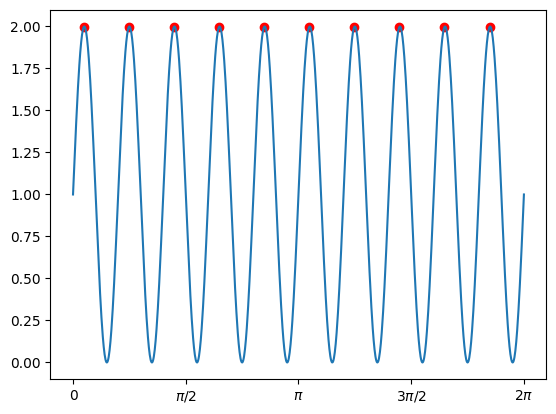

0.9993850772097721
0.9995015173146509
0.9996047752132372


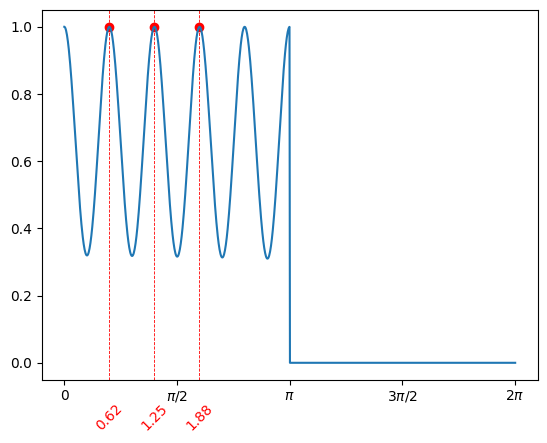

In [65]:
def cor_func(Y):
    N=len(Y)
    cor=np.zeros(N)
    for i in range(int(N/2)):
        cor[i]=np.sum(Y[:N-i]*Y[i:])/np.sum(Y[:N-i]**2)
        # cor[i]=np.sum(Y[:N-i]*Y[i:])/N
    return cor

X=np.linspace(0,2*np.pi,1000)
Y=np.sin(10*X)+1
plt.xticks(ticks=np.linspace(0, 2*np.pi, 5), labels=['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.plot(X,Y)
diff=np.diff(Y)
local_max=np.where((diff[:-1]>0)&(diff[1:]<0))[0]
plt.scatter(X[local_max],Y[local_max],c='r')
plt.show()
y=cor_func(Y)
diff=np.diff(y)
local_max=np.where((diff[:-1]>0)&(diff[1:]<0))[0]
plt.scatter(X[local_max[:3]],y[local_max[:3]],c='r')
for i,x0 in enumerate(X[local_max[:3]]):
    y_max=float(y[local_max[i]])
    ymax=(y_max - min(y)) / (max(y) - min(y))
    print(ymax)
    plt.axvline(x=x0,c='r',ls='--',lw=0.6,ymax=ymax)
    plt.text(x0, -0.2, f"{x0:.2f}", color='red', ha='center',rotation=45)  # -0.5はy位置を調整
plt.xticks(ticks=np.linspace(0, 2*np.pi, 5), labels=['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.plot(X,y)

In [30]:
a=[0,1,0,1,0,1,0,1,0]
a=np.array(a)
print(np.sum(a**2))
print(a[:len(a)-4]*a[4:])
print(cor_func(a))

4
[0 1 0 1 0]
[1.   0.   0.75 0.   0.5  0.   0.25 0.   0.  ]


In [2]:
img1=np.zeros((512,512),np.uint8)
img2=np.zeros((512,512),np.uint8)
# cv2.circle(img1,(256,256),100,(255,255,255),-1)
cv2.ellipse(img1,((256,256),(200,300),60),(255,255,255),-1)
cv2.circle(img2,(400,256),100,(255,255,255),-1)
contours1,_=cv2.findContours(img1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours2,_=cv2.findContours(img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for i in range(0,len(contours1)):
    cnt1=contours1[i]
    c1x,c1y=cv2.moments(cnt1)['m10']/cv2.moments(cnt1)['m00'],cv2.moments(cnt1)['m01']/cv2.moments(cnt1)['m00']
    x,y,w,h = cv2.boundingRect(cnt1)
    img=cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
    rect=cv2.minAreaRect(cnt1)
    print(rect)
    box=cv2.boxPoints(rect)
    box=np.array(box,dtype=np.int32)
    cv2.drawContours(img,[box],0,(255,0,255),2)
    for j in range(0,len(contours2)):
        cnt2=contours2[j]
        points = [[int(point[0][0]), int(point[0][1])] for point in cnt2]
        for k,pt in enumerate(points):
            if cv2.pointPolygonTest(cnt1, pt, False) >= 0:
                cv2.drawContours(img,[cnt1],0,(0,255,0),5)
                cv2.drawContours(img,[cnt2],0,(0,0,255),5)
                cv2.circle(img,(int(c1x),int(c1y)),5,(255,0,0),-1)
                cv2.circle(img,pt,5,(255,0,0),-1)
                break
        else:
            cv2.circle(img1,(256,256),100,(255,255,255),-1)
            img=cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
            cv2.drawContours(img,[cnt1],0,(0,255,0),5)
            cv2.drawContours(img,[cnt2],0,(0,0,255),5)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


((255.9861602783203, 255.97406005859375), (200.76470947265625, 300.1176452636719), 61.927513122558594)


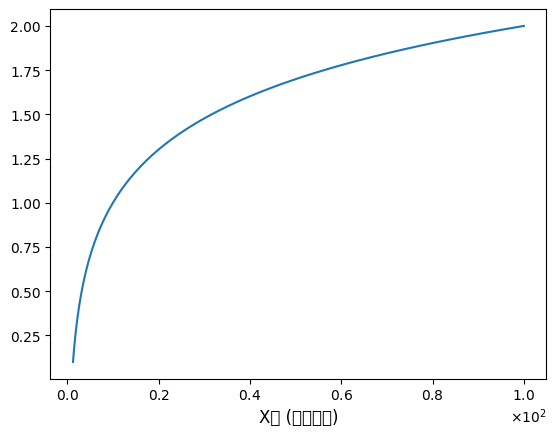

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# データ作成
x = np.logspace(0.1, 2, 100)
y = np.log10(x)

# グラフ作成
fig, ax = plt.subplots()
ax.plot(x, y)

# x軸のフォーマッタをカスタマイズ
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)  # 科学的表記を有効にする
formatter.set_powerlimits((-1, 1))  # 表示範囲を指定
ax.xaxis.set_major_formatter(formatter)

# 軸ラベルを設定
ax.set_xlabel("X軸 (指数表示)", fontsize=12)

plt.show()
